# 勾配ブースティング回帰（特徴量：ALL）の学習→予測→評価

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==2.0.3
# !pip install numpy==1.25.2
# !pip install matplotlib==3.7.1
# !pip install graphviz==0.20.3
# !pip install scikit-learn==1.2.2

In [11]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(graphviz.__version__)
print(sklearn.__version__)

2.0.3
1.25.2
3.7.1
0.20.3
1.2.2


In [13]:
# データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#df.head()

In [14]:
# 特徴量と目的変数の設定
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [15]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
print('X_trainの形状：', X_train.shape, ' y_trainの形状：', y_train.shape, ' X_testの形状：', X_test.shape, ' y_testの形状：', y_test.shape)

X_trainの形状： (404, 13)  y_trainの形状： (404,)  X_testの形状： (102, 13)  y_testの形状： (102,)


In [16]:
# モデルの学習
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, criterion='squared_error', loss ='squared_error', max_depth=2, min_samples_leaf=1, ccp_alpha=0, random_state=0)
model.fit(X_train, y_train)
model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [17]:
# 学習データの予測と評価
y_train_pred = model.predict(X_train)
print('MSE train: %.2f' % (mean_squared_error(y_train, y_train_pred)))
print('RMSE train: %.2f' % (mean_squared_error(y_train, y_train_pred) ** 0.5))

MSE train: 5.50
RMSE train: 2.34


In [18]:
# テストデータの予測と評価
y_test_pred = model.predict(X_test)
print('RMSE test: %.2f' % (mean_squared_error(y_test, y_test_pred) ** 0.5))

RMSE test: 5.04


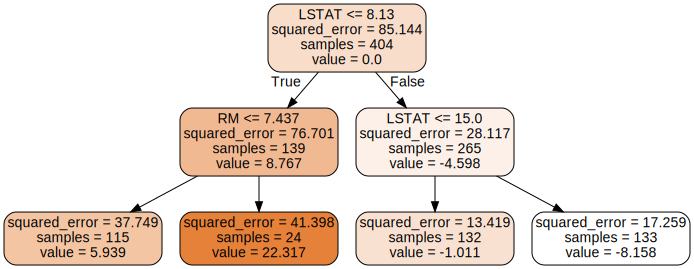

In [19]:
# 木の可視化
from sklearn import tree

# ブースティング1回目の木の可視化
dot_data = tree.export_graphviz(model.estimators_[0, 0], out_file=None, rounded=True, feature_names=X.columns, filled=True)
graphviz.Source(dot_data, format='png')

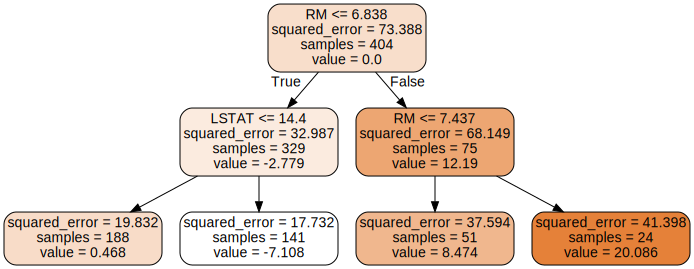

In [20]:
# ブースティング2回目の木の可視化
dot_data = tree.export_graphviz(model.estimators_[1, 0], out_file=None, rounded=True, feature_names=X.columns, filled=True)
graphviz.Source(dot_data, format='png')

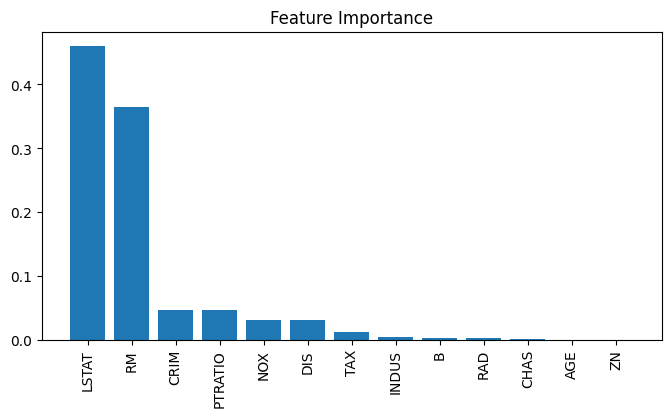

In [21]:
# 特徴量重要度を計算
importances = model.feature_importances_

# 特徴量重要度を降順にソート
indices = np.argsort(importances)[::-1]

# プロットの作成
plt.figure(figsize=(8, 4)) #プロットのサイズ指定
plt.title("Feature Importance")
# 特徴量の重要度と名前をソートした順に並び替え
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)

plt.show()